In [4]:
from IPython.core.display import HTML
HTML("""
<style>

div.text_cell_render h1 { /* Main titles bigger, centered */
text-align:center;
}

</style>
""")

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

![](images/tensorflow.jpg)

![](https://www.android.com/static/2016/img/share/andy-lg.png)

![](images/android-tensorflow-app-structure_2.png)

![](images/android_tensorflow_classifier_results.jpg)

![](images/example.png)

![](images/mnist.jpeg)

Классическая задача распознавания рукописных цифр на основе набора данных [MNIST](http://yann.lecun.com/exdb/mnist/)

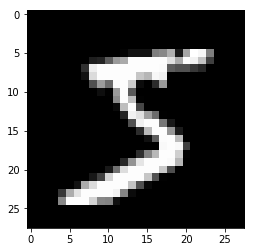

In [12]:
from model import data
x_train, y_train, x_test, y_test = data.load_data()
plt.imshow(x_train[0].reshape((28,28)), cmap='gray')

In [53]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical


def load_data(flatten=True):
    """
    Load MNIST dataset, do train-test split, convert data to the necessary format
    :return:
    """
    if flatten:
        reshape = _flatten
    else:
        reshape = _square

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = reshape(x_train)
    x_test = reshape(x_test)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test


def _flatten(x: np.ndarray) -> np.ndarray:
    return x.reshape(x.shape[0], 28 * 28)


def _square(x: np.ndarray) -> np.ndarray:
    return x.reshape(x.shape[0], 28, 28, 1)

# Что используем

- [TensorFlow backend](https://www.tensorflow.org/)
- [Keras](https://keras.io/)
- Android SDK > 23
- [org.tensorflow:tensorflow-android:1.3.0](https://www.tensorflow.org/mobile/android_build)

In [57]:
!cat model/requirements.txt

numpy
tensorflow
keras
h5py

# 1. Neural Network

# Простейшая однослойная нейросеть

![](images/one_layer.png)

In [44]:
import keras
keras.backend.clear_session()
tf.reset_default_graph()

In [45]:
from keras import metrics, Sequential
from keras.layers import Dense

model = Sequential(layers=[
    Dense(10, activation='softmax', input_shape=(784,))
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.layers import K
from keras.optimizers import SGD

model.compile(loss=K.categorical_crossentropy,
              optimizer=SGD(),
              metrics=[metrics.categorical_accuracy])

In [47]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.2668 - categorical_accuracy: 0.7063 - val_loss: 0.8042 - val_categorical_accuracy: 0.8336
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.7117 - categorical_accuracy: 0.8414 - val_loss: 0.6047 - val_categorical_accuracy: 0.8602
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.5852 - categorical_accuracy: 0.8595 - val_loss: 0.5249 - val_categorical_accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.5244 - categorical_accuracy: 0.8687 - val_loss: 0.4794 - val_categorical_accuracy: 0.8805
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4871 - categorical_accuracy: 0.8751 - val_loss: 0.4500 - val_categorical_accuracy: 0.8858
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4615 - categor

# Многослойная нейросеть

![](images/deep_neural_network.png)

In [48]:
keras.backend.clear_session()
tf.reset_default_graph()

model = Sequential(layers=[
    Dense(200, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
from keras.callbacks import TensorBoard

model.compile(loss=K.categorical_crossentropy,
              optimizer=SGD(),
              metrics=[metrics.categorical_accuracy])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[TensorBoard(log_dir='/tmp/tensorflow/dnn_jup')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.1825 - categorical_accuracy: 0.7202 - val_loss: 0.6388 - val_categorical_accuracy: 0.8595
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5502 - categorical_accuracy: 0.8672 - val_loss: 0.4509 - val_categorical_accuracy: 0.8903
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4361 - categorical_accuracy: 0.8865 - val_loss: 0.3853 - val_categorical_accuracy: 0.9010
Epoch 4/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.3857 - categorical_accuracy: 0.8961 - val_loss: 0.3507 - val_categorical_accuracy: 0.9072
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3557 - categorical_accuracy: 0.9029 - val_loss: 0.3284 - val_categorical_accuracy: 0.9117
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3348 - categor

# Tensorboard

![](images/tensorboard_graph.png)

![](images/tensorboard_scalars.png)

# Экспорт модели

- pbtxt
- chkp
- pb
- **optimal pb** for android
- ...

In [51]:
from model import exporter

exporter.export_model(tf.train.Saver(), 
                      input_names=['dense_1_input'], 
                      output_name='dense_2/Softmax', 
                      model_name="dnn_jup")

INFO:tensorflow:Restoring parameters from out/dnn.chkp


INFO:tensorflow:Restoring parameters from out/dnn.chkp


INFO:tensorflow:Froze 4 variables.


INFO:tensorflow:Froze 4 variables.


Converted 4 variables to const ops.
15 ops in the final graph.
graph saved!


In [52]:
def export_model(saver: tf.train.Saver, input_names: list, output_name: str, model_name: str):
    """
    You can find node names by using debugger: just connect it right after model is created and look for nodes in the inspec
    :param saver:
    :param input_names:
    :param output_name:
    :param model_name:
    :return:
    """
    os.makedirs("./out", exist_ok=True)
    tf.train.write_graph(K.get_session().graph_def, 'out',
                         model_name + '_graph.pbtxt')

    saver.save(K.get_session(), 'out/' + model_name + '.chkp')

    # pbtxt is human readable representation of the graph
    freeze_graph.freeze_graph('out/' + model_name + '_graph.pbtxt', None,
                              False, 'out/' + model_name + '.chkp', output_name,
                              "save/restore_all", "save/Const:0",
                              'out/frozen_' + model_name + '.pb', True, "")

    input_graph_def = tf.GraphDef()
    with tf.gfile.Open('out/frozen_' + model_name + '.pb', "rb") as f:
        input_graph_def.ParseFromString(f.read())

    # optimization of the graph so we can use it in the android app
    output_graph_def = optimize_for_inference_lib.optimize_for_inference(
        input_graph_def, input_names, [output_name],
        tf.float32.as_datatype_enum)

    # This is archived optimal graph in the protobuf format we'll use in our android App.
    with tf.gfile.FastGFile('out/opt_' + model_name + '.pb', "wb") as f:
        f.write(output_graph_def.SerializeToString())

    print("graph saved!")

In [58]:
!ls out/

checkpoint                   dnn_graph.pbtxt
dnn.chkp.data-00000-of-00001 frozen_dnn.pb
dnn.chkp.index               opt_dnn.pb
dnn.chkp.meta


# Свёрточная нейосеть

![](images/common_cnn_design.jpg)

![](images/conv_layers.png)

In [60]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten

In [65]:
keras.backend.clear_session()
tf.reset_default_graph()

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=5, strides=1,
                 padding='same', activation='relu',
                 input_shape=[28, 28, 1]))
# 28*28*64
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 14*14*64

model.add(Conv2D(filters=32, kernel_size=4, strides=1,
                 padding='same', activation='relu'))
# 14*14*128
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 7*7*128

model.add(Conv2D(filters=64, kernel_size=3, strides=1,
                 padding='same', activation='relu'))
# 7*7*256
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 4*4*256

model.add(Flatten())
model.add(Dense(64 * 4, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [67]:
x_train, y_train, x_test, y_test = data.load_data(flatten=False)

In [69]:
!rm -rf /tmp/tensorflow/conv_jup
from keras.optimizers import Adam

model.compile(loss=K.categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.categorical_accuracy])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          validation_data=(x_test, y_test),
          callbacks=[TensorBoard(log_dir='/tmp/tensorflow/conv_jup')])

In [ ]:
exporter.export_model(tf.train.Saver(), 
                      input_names=['conv2d_1_input'], 
                      output_name='dense_2/Softmax', 
                      model_name="conv_jup")

# 2. Android

![](images/example.png)

# 3. Интеграция

```groovy
implementation 'org.tensorflow:tensorflow-android:1.3.0'
```

```kotlin
import org.senior_sigan.digits.views.DrawView
import org.senior_sigan.digits.ml.models.DigitsClassifierFlatten // for DNN
import org.senior_sigan.digits.ml.models.DigitsClassifierSquare // for Conv
```

```kotlin
// somewhere in another thread load the model
val clf = DigitsClassifierFlatten(
    assetManager=assets, 
    modelPath="dnn.pb", 
    inputSize=28, 
    inputName="dense_1_input", 
    outputName="dense_2/Softmax", 
    name="dnn")

// somewhere on UI thread
val drawView = find<DrawView>(R.id.draw)

// somewhere on another thread
val pred = clf.predict(drawView.pixelData)

Log.i("Dnn", "${pred.label} ${pred.proba}")

```